In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import font_manager


# 日本語フォントの設定 (Hiragino Sansを使用)
font_paths = [
    "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
    "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc",
    "/System/Library/Fonts/Hiragino Sans W3.ttc",
    "/System/Library/Fonts/Hiragino Sans W6.ttc",
]
# 存在するフォントのパスを見つける
font_path = None
for path in font_paths:
    try:
        fontprop = font_manager.FontProperties(fname=path)
        font_path = path
        break
    except FileNotFoundError:
        continue

if font_path is None:
    raise FileNotFoundError(
        "日本語フォントが見つかりません。システムにフォントがインストールされていることを確認してください。"
    )

fontprop = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()

import seaborn as sns
import glob
import datetime
import scipy.stats as stats

# 警告を無視する設定
import warnings

warnings.filterwarnings("ignore")
from google.cloud import bigquery

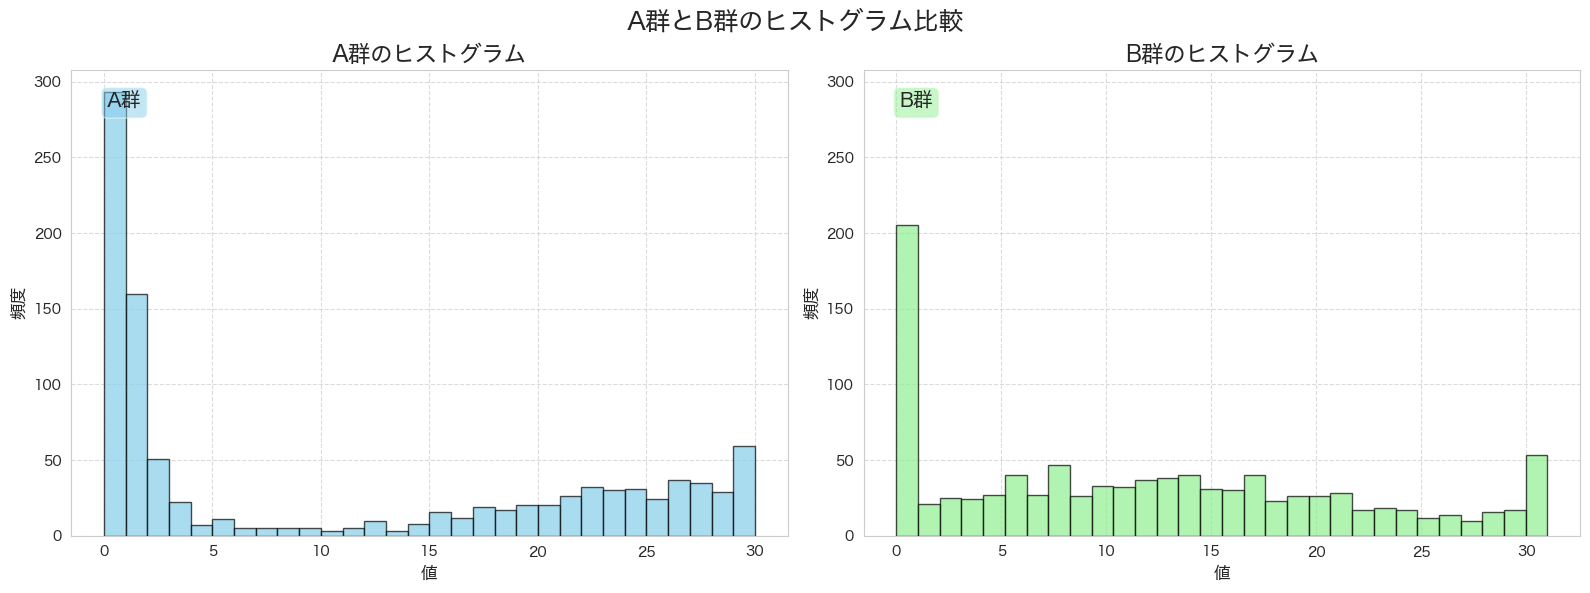

複合サンプル（A+B）の平均: 10.50, 標準偏差: 11.37
Cサンプルの平均: 11.94, 標準偏差: 9.40


In [127]:
# シード値を設定して再現性を確保
np.random.seed(1)

# パラメータ設定
n_samples = 1000  # 総サンプル数
ratio_a = 0.55  # A群の比率

# A群: 0が最頻値の偏ったパレート分布
n_a = int(n_samples * ratio_a)
a_samples = np.round(stats.pareto.rvs(2, size=n_a) - 1, 0).clip(0, 30).astype(int)

# B群: 平均30、標準偏差10の正規分布を0-30で切断
n_b = n_samples - n_a
mean, std = 30, 10
lower, upper = 0, 31
b_samples = (
    stats.truncnorm.rvs((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std, size=n_b)
    .clip(0, 32)
    .astype(int)
)

# 2つの分布を結合（複合サンプル）
all_samples = np.concatenate([a_samples, b_samples])

# 複合サンプルの平均と標準偏差を計算
sample_mean = np.mean(all_samples)
sample_std = np.std(all_samples)

# C群: all_samplesの平均と標準偏差を使用した正規分布
c_samples = np.round(np.random.normal(sample_mean, sample_std, n_samples)).clip(0, 31).astype(int)


# プロットの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# A群のヒストグラム
ax1.hist(all_samples, bins=30, edgecolor="black", color="skyblue", alpha=0.7)
ax1.set_title("A群のヒストグラム", fontsize=16)
ax1.set_xlabel("値", fontsize=12)
ax1.set_ylabel("頻度", fontsize=12)

# B群のヒストグラム
ax2.hist(c_samples, bins=30, edgecolor="black", color="lightgreen", alpha=0.7)
ax2.set_title("B群のヒストグラム", fontsize=16)
ax2.set_xlabel("値", fontsize=12)
ax2.set_ylabel("頻度", fontsize=12)

# Y軸の範囲を揃える
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# グリッドの追加
ax1.grid(True, linestyle="--", alpha=0.7)
ax2.grid(True, linestyle="--", alpha=0.7)

# 凡例の追加
ax1.text(
    0.05,
    0.95,
    "A群",
    transform=ax1.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="skyblue", alpha=0.5),
)
ax2.text(
    0.05,
    0.95,
    "B群",
    transform=ax2.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.5),
)

# 全体のタイトル追加
fig.suptitle("A群とB群のヒストグラム比較", fontsize=18)

# レイアウトの調整
plt.tight_layout()
fig.subplots_adjust(top=0.88)  # 全体のタイトル用にスペースを確保

# グラフの表示
plt.show()

# 各サンプルの基本統計量を出力
print(f"複合サンプル（A+B）の平均: {np.mean(all_samples):.2f}, 標準偏差: {np.std(all_samples):.2f}")
print(f"Cサンプルの平均: {np.mean(c_samples):.2f}, 標準偏差: {np.std(c_samples):.2f}")

In [105]:
np.median(all_samples), np.median(c_samples)

(np.float64(18.0), np.float64(17.0))

In [94]:
import numpy as np
import scipy.stats as stats

# 前のコードで生成したサンプルを使用
# all_samples: 複合サンプル（A+B）
# c_samples: Cサンプル

# 1. コルモゴロフ・スミルノフ検定
ks_statistic, ks_pvalue = stats.ks_2samp(all_samples, c_samples)

# 2. マン・ホイットニーのU検定
mw_statistic, mw_pvalue = stats.mannwhitneyu(all_samples, c_samples)

# 3. アンダーソン・ダーリング検定
ad_result = stats.anderson_ksamp([all_samples, c_samples])

# 4. クラスカル・ウォリス検定
kw_statistic, kw_pvalue = stats.kruskal(all_samples, c_samples)

# 結果の出力
print("1. コルモゴロフ・スミルノフ検定:")
print(f"   統計量: {ks_statistic:.4f}, p値: {ks_pvalue:.4e}")

print("\n2. マン・ホイットニーのU検定:")
print(f"   統計量: {mw_statistic:.4f}, p値: {mw_pvalue:.4e}")

print("\n3. アンダーソン・ダーリング検定:")
print(f"   統計量: {ad_result.statistic:.4f}")
if hasattr(ad_result, "pvalue"):
    print(f"   p値: {ad_result.pvalue:.4e}")
else:
    print("   p値: 利用不可")

if hasattr(ad_result, "critical_values") and hasattr(ad_result, "significance_level"):
    if isinstance(ad_result.critical_values, (list, np.ndarray)) and isinstance(
        ad_result.significance_level, (list, np.ndarray)
    ):
        print("   臨界値:")
        for significance_level, critical_value in zip(ad_result.significance_level, ad_result.critical_values):
            print(f"     {significance_level}%: {critical_value:.4f}")
    else:
        print("   臨界値: 個別の値として利用不可")
else:
    print("   臨界値: 利用不可")

print("\n4. クラスカル・ウォリス検定:")
print(f"   統計量: {kw_statistic:.4f}, p値: {kw_pvalue:.4e}")

# 有意水準
alpha = 0.05

print(f"\n有意水準 {alpha} で判断:")
for test_name, p_value in [
    ("コルモゴロフ・スミルノフ検定", ks_pvalue),
    ("マン・ホイットニーのU検定", mw_pvalue),
    ("クラスカル・ウォリス検定", kw_pvalue),
]:
    if p_value < alpha:
        print(f"{test_name}: 分布に有意な差がある")
    else:
        print(f"{test_name}: 分布に有意な差があるとは言えない")

# アンダーソン・ダーリング検定の解釈
if hasattr(ad_result, "pvalue"):
    if ad_result.pvalue < alpha:
        print(f"アンダーソン・ダーリング検定: 分布に有意な差がある (p値: {ad_result.pvalue:.4e})")
    else:
        print(f"アンダーソン・ダーリング検定: 分布に有意な差があるとは言えない (p値: {ad_result.pvalue:.4e})")
else:
    print("アンダーソン・ダーリング検定: p値が利用不可のため、判断できません")

1. コルモゴロフ・スミルノフ検定:
   統計量: 0.1410, p値: 4.3888e-09

2. マン・ホイットニーのU検定:
   統計量: 494644.0000, p値: 6.7805e-01

3. アンダーソン・ダーリング検定:
   統計量: 28.3315
   p値: 1.0000e-03
   臨界値: 個別の値として利用不可

4. クラスカル・ウォリス検定:
   統計量: 0.1724, p値: 6.7802e-01

有意水準 0.05 で判断:
コルモゴロフ・スミルノフ検定: 分布に有意な差がある
マン・ホイットニーのU検定: 分布に有意な差があるとは言えない
クラスカル・ウォリス検定: 分布に有意な差があるとは言えない
アンダーソン・ダーリング検定: 分布に有意な差がある (p値: 1.0000e-03)


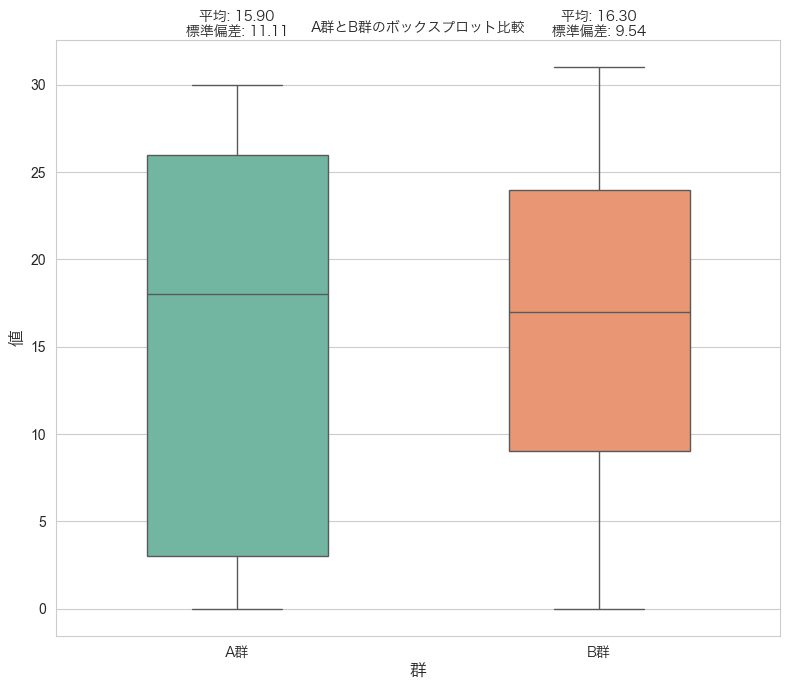

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

# 日本語フォントの設定 (Hiragino Sansを使用)
font_paths = [
    "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
    "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc",
    "/System/Library/Fonts/Hiragino Sans W3.ttc",
    "/System/Library/Fonts/Hiragino Sans W6.ttc",
]
# 存在するフォントのパスを見つける
font_path = None
for path in font_paths:
    try:
        fontprop = font_manager.FontProperties(fname=path)
        font_path = path
        break
    except FileNotFoundError:
        continue

if font_path is None:
    raise FileNotFoundError(
        "日本語フォントが見つかりません。システムにフォントがインストールされていることを確認してください。"
    )

fontprop = font_manager.FontProperties(fname=font_path)

# データの生成
np.random.seed(42)
A_group = all_samples
B_group = c_samples

# プロットの設定
plt.figure(figsize=(8, 7))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# ボックスプロットの作成
sns.boxplot(data=[A_group, B_group], width=0.5)

# プロットの装飾（フォントプロパティを指定）
plt.title("A群とB群のボックスプロット比較", fontsize=16, fontproperties=fontprop)
plt.xlabel("群", fontsize=12, fontproperties=fontprop)
plt.ylabel("値", fontsize=12, fontproperties=fontprop)
plt.xticks([0, 1], ["A群", "B群"], fontsize=10, fontproperties=fontprop)
plt.yticks(fontsize=10)

# 統計情報の追加（フォントプロパティを指定）
for i, group in enumerate([A_group, B_group]):
    plt.text(
        i,
        plt.ylim()[1],
        f"平均: {np.mean(group):.2f}\n標準偏差: {np.std(group):.2f}",
        horizontalalignment="center",
        verticalalignment="bottom",
        fontproperties=fontprop,
    )

plt.tight_layout()
plt.show()

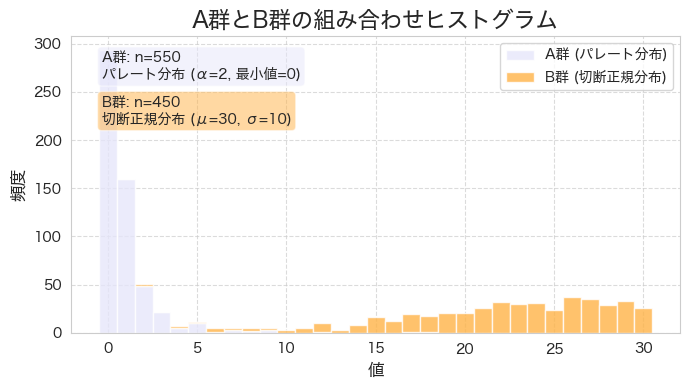

In [133]:
# 色の設定
color_a = "#E6E6FA"  # 薄い紫
color_b = "#FFB347"

# ヒストグラムの作成
plt.figure(figsize=(7, 4))

# ビンの設定（0から30まで）
bins = np.arange(0, 32) - 0.5

# A群とB群のヒストグラムを重ねて描画
plt.hist(
    [a_samples, b_samples],
    bins=bins,
    stacked=True,
    color=[color_a, color_b],
    alpha=0.8,
    label=["A群 (パレート分布)", "B群 (切断正規分布)"],
)

plt.title("A群とB群の組み合わせヒストグラム", fontsize=16)
plt.xlabel("値", fontsize=12)
plt.ylabel("頻度", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# x軸の目盛りを調整
plt.xticks(range(0, 31, 5))

# テキスト注釈を追加
plt.text(
    0.05,
    0.95,
    f"A群: n={n_a}\nパレート分布 (α=2, 最小値=0)",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor=color_a, alpha=0.5),
)
plt.text(
    0.05,
    0.80,
    f"B群: n={n_b}\n切断正規分布 (μ=30, σ=10)",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor=color_b, alpha=0.5),
)

plt.tight_layout()
plt.show()